In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.model_selection import train_test_split

## Data Processing

In [30]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [31]:
df.info

<bound method DataFrame.info of      age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  target
0     63    1   3       145   233    1  ...      0      2.3      0   0     1       1
1     37    1   2       130   250    0  ...      0      3.5      0   0     2       1
2     41    0   1       130   204    0  ...      0      1.4      2   0     2       1
3     56    1   1       120   236    0  ...      0      0.8      2   0     2       1
4     57    0   0       120   354    0  ...      1      0.6      2   0     2       1
..   ...  ...  ..       ...   ...  ...  ...    ...      ...    ...  ..   ...     ...
298   57    0   0       140   241    0  ...      1      0.2      1   0     3       0
299   45    1   3       110   264    0  ...      0      1.2      1   0     3       0
300   68    1   0       144   193    1  ...      0      3.4      1   2     3       0
301   57    1   0       130   131    0  ...      1      1.2      1   1     3       0
302   57    0   1       130   236

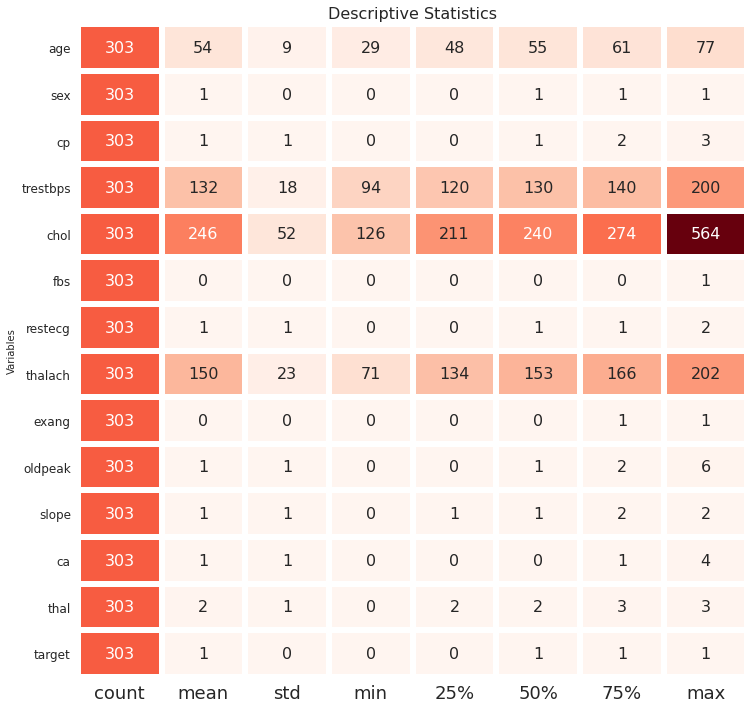

In [32]:
desc = df.describe().T
df1 = pd.DataFrame(index=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'], 
                   columns= ["count","mean","std","min",
                             "25%","50%","75%","max"], data= desc )

f,ax = plt.subplots(figsize=(12,12))

sns.heatmap(df1, annot=True,cmap = "Reds", fmt= '.0f',
            ax=ax,linewidths = 5, cbar = False,
            annot_kws={"size": 16})

plt.xticks(size = 18)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("Variables")
plt.title("Descriptive Statistics", size = 16)
plt.show()

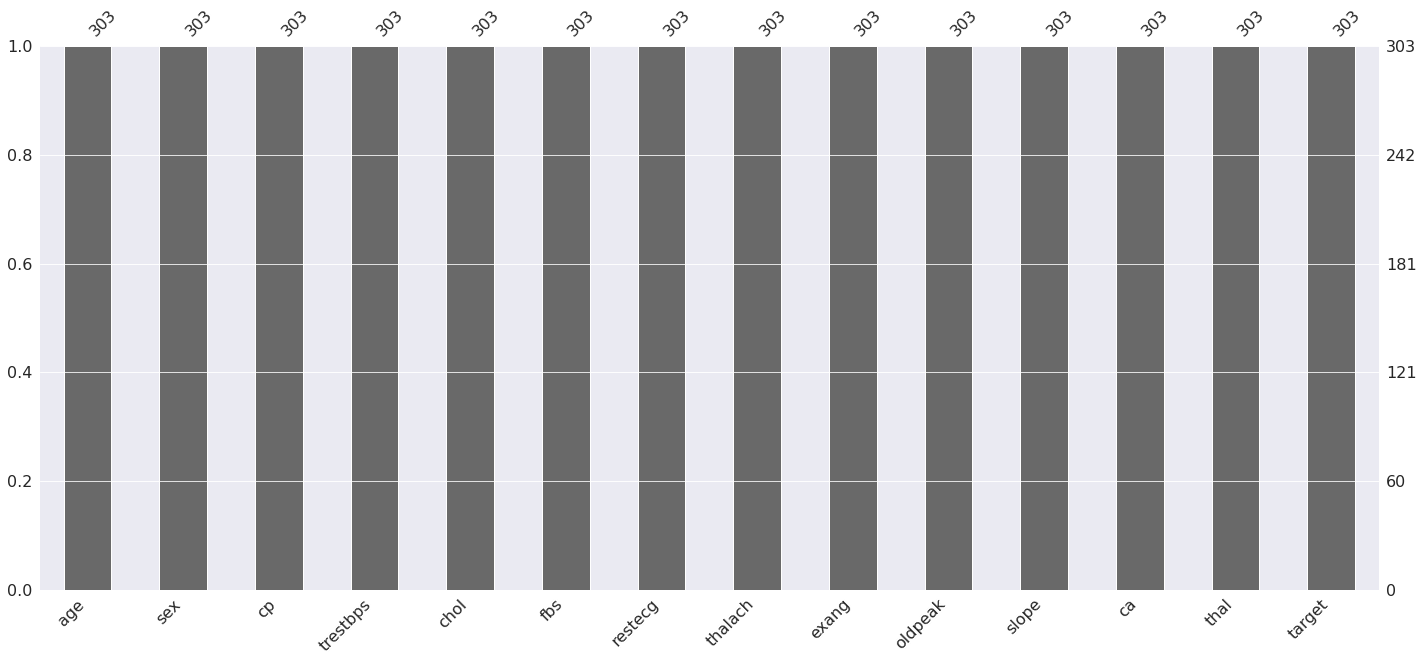

In [33]:
import missingno as msno
msno.bar(df)
plt.show()

## Data preparation for Classification

In [34]:
X = df.drop(['target'],axis=1)
y = df[['target']]

In [35]:
print('X Shape', X.shape)
print('Y Shape',y.shape)

X Shape (303, 13)
Y Shape (303, 1)


In [36]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33,random_state=42)

print('Number transations x_train df',X_train.shape)
print('Number transations x_test df',X_test.shape)
print('Number transations y_train df',y_train.shape)
print('Number transations y_test df',y_test.shape)

Number transations x_train df (203, 13)
Number transations x_test df (100, 13)
Number transations y_train df (203, 1)
Number transations y_test df (100, 1)


## Decision Tree

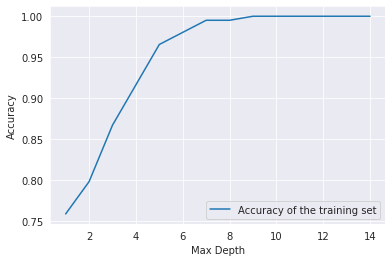

In [37]:
training_accuracy = []
test_accuracy = []

max_dep = range(1,15)

for md in max_dep:
    tree = DecisionTreeClassifier(max_depth=md,random_state=0)
    tree.fit(X_train,y_train)
    training_accuracy.append(tree.score(X_train, y_train))
    test_accuracy.append(tree.score(X_test, y_test))
 
plt.plot(max_dep,training_accuracy, label='Accuracy of the training set')
plt.ylabel('Accuracy')
plt.xlabel('Max Depth')
plt.legend()
#Plotting accuracies to the depth values to find out the max depth value that corresponds to the maximum accuracy
#In this case, depth=10

In [38]:
tree = DecisionTreeClassifier(max_depth=10,random_state=0)
tree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [39]:
print(tree.score(X_train,y_train))
print(tree.score(X_test,y_test))

1.0
0.75


## Gaussian Naive Bayes

In [40]:
classifier = GaussianNB()
naive_bayes_model = classifier.fit(X_train, y_train)
y_true, y_pred = y_test, naive_bayes_model.predict(X_test)


print(classification_report(y_true, y_pred))
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

print(metrics.confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.88      0.81        42
           1       0.90      0.79      0.84        58

    accuracy                           0.83       100
   macro avg       0.83      0.84      0.83       100
weighted avg       0.84      0.83      0.83       100

Accuracy: 0.83
Precision: 0.9019607843137255
Recall: 0.7931034482758621
[[37  5]
 [12 46]]


In [42]:
Y_hat = naive_bayes_model.predict(X_test)
Y_hat

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0])

The accuracy of our confusion matrix is:
 [[37  5]
 [12 46]]


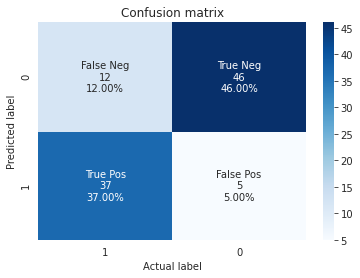

In [44]:
model_conf = confusion_matrix(y_test, Y_hat)
model_conf
print('The accuracy of our confusion matrix is:\n', model_conf)
group_names = ['True Pos','False Pos','False Neg','True Neg']
group_counts = ["{0:0.0f}".format(value) for value in
                model_conf.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     model_conf.flatten()/np.sum(model_conf)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(model_conf, annot=labels, fmt='', cmap='Blues')
plt.xticks([0.5,1.5],labels=[1,0])
plt.yticks([0.5,1.5],labels=[1,0])
ax.set_ylim([0,2])
plt.title('Confusion matrix')
plt.xlabel('Actual label')
plt.ylabel('Predicted label')
plt.show()
